# Обработка аудио данных

In [5]:
import librosa
import numpy as np
import pandas as pd
import scipy
import scipy.fft
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import librosa.filters
import hashlib
from glob import glob
import os
import sklearn

def draw_waveform(wav, sr, figsize=(14, 5)):
 # Отрисовка звукового сигнала во временной области
   plt.figure(figsize=figsize)
   librosa.display.waveshow(wav, sr=sr)
   plt.show()

In [6]:
def draw_spectrogram(file_path):
  # Построение спектрограммы
  wav, sr = librosa.load(file_path, sr=44100, mono=True)
  stft = librosa.stft(wav)
  stft_db = librosa.amplitude_to_db(abs(stft))

  return librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')

def draw_melspectrogram(file_path):
  # Построение мелспектрограммы
  sig, fs = librosa.load(file_path)
  S = librosa.feature.melspectrogram(y=sig, sr=fs)

  return librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='hz')

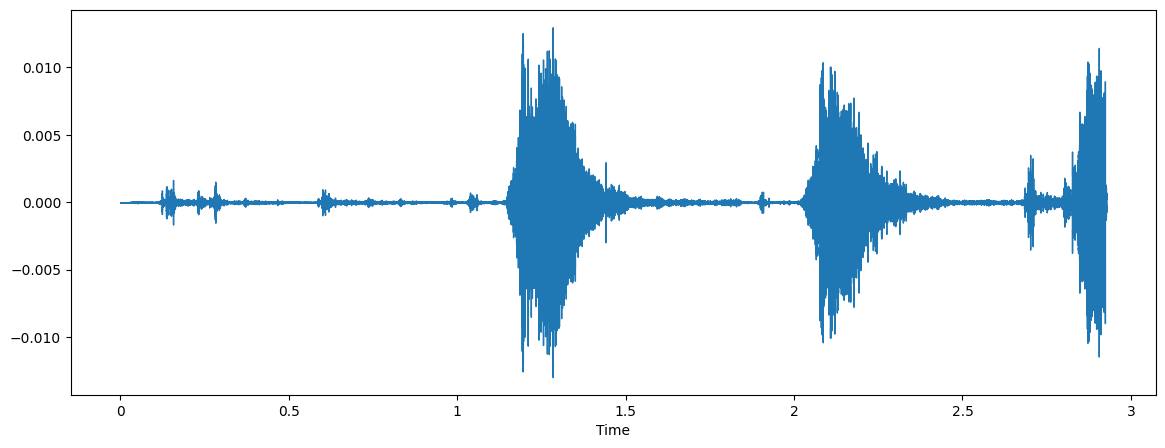

In [13]:
wav, sr = librosa.load('T3_IRON.mp3', sr=44100, mono=True)
draw_waveform(wav, sr)
ipd.Audio(wav, rate=sr)

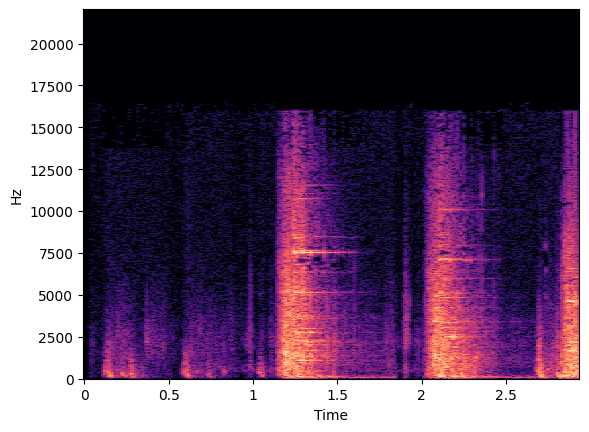

In [15]:
draw_spectrogram('T3_IRON.mp3')

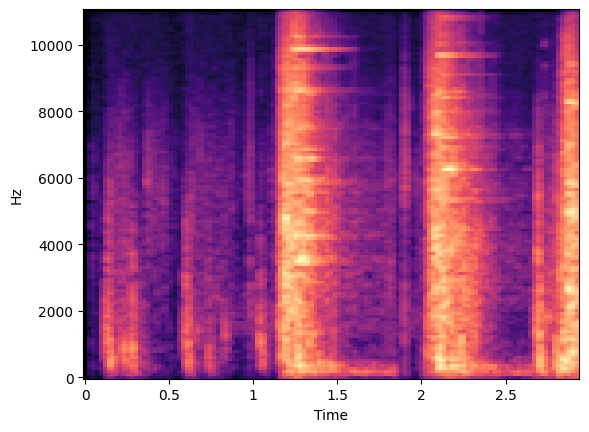

In [16]:
draw_melspectrogram('T3_IRON.mp3')

In [18]:
# Получение мелкепстральных коэффициентов
mfcc_feat = librosa.feature.mfcc(y=wav, sr=sr)
mfccdf = pd.DataFrame(mfcc_feat)
mfccdf.to_csv('mfcc_feat.csv')

In [23]:
mfccdf

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,-1052.844238,-1052.844238,-1021.030579,-933.159424,-905.671631,-920.559692,-945.946411,-954.321228,-961.784851,-905.549316,...,-609.350525,-567.429626,-514.984680,-480.814117,-454.876282,-450.440613,-451.797424,-445.014008,-450.860535,-506.659271
1,0.000000,0.000000,23.253891,55.696583,63.578018,49.609245,36.484398,32.682606,29.332607,92.601631,...,181.903442,173.540009,163.828400,161.964294,153.763397,158.704926,168.568329,157.635406,162.575577,174.065308
2,0.000000,0.000000,-4.494861,-17.980656,-27.942781,-30.858389,-22.754223,-14.034031,-11.508003,13.636347,...,-61.056477,-68.663849,-76.666672,-83.994194,-96.020203,-100.507774,-96.153572,-99.563583,-96.940613,-91.920639
3,0.000000,0.000000,-5.517197,-12.274914,-15.790535,-16.478207,-4.993206,-1.364361,-3.095833,3.866794,...,37.852135,52.742157,64.687180,62.475784,58.319710,55.873734,54.290924,47.906998,42.442772,37.787682
4,0.000000,0.000000,2.206847,-1.492306,-1.719017,-0.097737,2.612700,-3.941759,-3.524282,-3.067132,...,-25.331747,-23.924126,-25.508457,-34.025826,-40.530968,-40.002163,-37.803764,-37.265427,-36.224686,-29.455746
5,0.000000,0.000000,3.659592,10.031141,13.937344,14.641163,10.486814,5.495987,8.475725,5.906231,...,22.189854,26.715477,33.185921,27.788891,27.181122,27.982655,29.696213,26.432125,24.439171,20.545589
6,0.000000,0.000000,0.536628,-5.564815,-6.521855,-7.590860,-6.574200,-4.505589,-4.962688,-16.400591,...,17.712755,1.924856,-12.923013,-10.450857,-12.792828,-25.116373,-26.649158,-18.844666,-19.863625,-10.858398
7,0.000000,0.000000,-2.527757,4.080565,4.338442,4.315470,0.609625,4.740060,6.273315,-9.191989,...,15.327024,12.237747,5.016592,13.301332,20.262451,7.266953,1.203860,17.369343,11.255072,0.953069
8,0.000000,0.000000,-3.404861,3.411330,3.429543,-0.526870,-9.823299,-6.872539,-4.576300,-14.634239,...,9.597595,8.182224,-3.245265,-9.905924,-16.301598,-21.802567,-22.521301,-29.486824,-36.770374,-22.203354
9,0.000000,0.000000,-4.381823,9.700817,12.426241,8.283213,-2.514246,-0.765893,-2.757110,-10.467228,...,14.998299,7.819273,-1.730262,7.051708,15.045418,10.867222,10.044323,18.063889,14.144111,4.416192
